In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import pybaseball as pybb


In [82]:
# team = 'STL'
# year = 2023

In [83]:
# df_team_log_pitch = pybb.team_game_logs(year, team, "pitching")
# df_team_log_pitch

In [84]:
# df_team_log_bat = pybb.team_game_logs(year, team, "batting")
# df_team_log_bat

## __Gathering Batting and Pitching Stats__

#### 1. Organizing Selected Batting Stats

In [85]:
def organize_batting_stats(year: int, team: str):
    
    # Getting DataFrame of Team Pitching for Specified Year Using pybaseball
    df_team_log_bat = pybb.team_game_logs(year, team, "batting")


    # ---------------- Calculating AVG ----------------
    calc_AVG = df_team_log_bat['H']/df_team_log_bat['AB']
    calc_AVG.name = 'Calculated AVG for Game'

    # ---------------- Calculating OBP ----------------
    calc_OBP = (df_team_log_bat['H']+df_team_log_bat['BB']+df_team_log_bat['HBP'])/df_team_log_bat['PA']
    calc_OBP.name = 'Calculated OBP for Game'

    # ---------------- Calculating SLG ----------------
    # Number of first base hits is: 1B = H - (2B + 3B + HR)
    num_1B = df_team_log_bat['H']-(df_team_log_bat['2B']+df_team_log_bat['3B']+df_team_log_bat['HR'])
    calc_SLG = (1*num_1B + 2*df_team_log_bat['2B'] + 3*df_team_log_bat['3B'] + 4*df_team_log_bat['HR']) / df_team_log_bat['AB']
    calc_SLG.name = 'Calculated SLG for Game'

    # ---------------- Organizing Selected Batting Stats into DataFrame ----------------
    bat_cols_to_keep = ['Date', 'Opp', 'Rslt', 'RBI']
    df_bat = df_team_log_bat[bat_cols_to_keep]
    df_bat = pd.concat([df_bat, calc_AVG, calc_OBP, calc_SLG], axis=1)

    return df_bat

#### 2. Organizing Selected Pitching Stats

In [86]:
def organize_pitching_stats(year: int, team: str, x: int):
    '''
        x = number of games to consider for winPRCNT Past x Games
    '''

    # Getting DataFrame of Team Pitching for Specified Year Using pybaseball
    df_team_log_pitch = pybb.team_game_logs(year, team, "pitching")


    # ---------------- Calculating winPRCNT Past x Games ----------------

    # For some reason the pybb.schedule_and_record function doesn't work always
    # I think its a pybaseball package issue.
    df_team_schedule = pybb.schedule_and_record(year, team)
    win_loss_arr = df_team_schedule['W/L'].to_numpy()
    win_arr = win_loss_arr == ('W' or 'W-wo') # True if win or walkoff win

    win_prcnt = np.zeros((162))
    for i in range(0, len(win_arr), x):
        section_win_prcnt = win_arr[i:i+x].sum() / x
        if i+x < 162:
            win_prcnt[i+x] = section_win_prcnt

    winPRCNT_past_x_games = pd.Series(win_prcnt)
    winPRCNT_past_x_games.name = f'Calculated Win Percentage for Past Games (Window Size={x})'

    # ---------------- Calculating ERA ----------------
    calc_ERA = (df_team_log_pitch['ER'] / df_team_log_pitch['IP']) * 9
    calc_ERA.name = 'Calculated ERA for Game'

    # ---------------- Organizing Selected Pitching Stats into DataFrame ----------------
    pitch_cols_to_keep = ['Date', 'Opp', 'Rslt']
    df_pitch = df_team_log_pitch[pitch_cols_to_keep]
    df_pitch = pd.concat([df_pitch, calc_ERA, winPRCNT_past_x_games], axis=1)
    #df_pitch = pd.concat([df_pitch, calc_ERA], axis=1)

    return df_pitch

## __Optimization for Optimal Weights for ERA statistic__

In [190]:
start_year = 2019
end_year = 2024

pitch_mult_yrs = []
for i in range(end_year-start_year+1):
    pitch_mult_yrs.append(organize_pitching_stats(start_year+i, 'STL', 5))


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:36: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors="ignore")


http://www.baseball-reference.com/teams/STL/2019-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read

http://www.baseball-reference.com/teams/STL/2020-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

http://www.baseball-reference.com/teams/STL/2021-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read

http://www.baseball-reference.com/teams/STL/2022-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read

http://www.baseball-reference.com/teams/STL/2023-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_game_logs.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read

http://www.baseball-reference.com/teams/STL/2024-schedule-scores.shtml


/home/ubuntu/wslcoding/pyprojects/sabermetrics-ML-research/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


In [ ]:
def find_optimal_weights(window_size, df_stats):
    '''
        df_stats = either a ```df_pitch``` DataFrame of ```df_bat``` DataFrame
    '''

    ERA_arr = df_stats['Calculated ERA for Game'].to_numpy()
    arr = ERA_arr 
    #window_size = 7 # Defining window size


    def objective(w, arr, window_size):
        """ w is an ndarray with 'window_size' number of weights """

        num_preds = len(arr) - window_size # Number of squared error terms
        total_error = 0
        for i in range(num_preds):
            pred_ERA_i = np.dot(w, arr[i:window_size+i])
            total_error += (arr[window_size+i]-pred_ERA_i)**2

        return total_error

    # Constraint: sum of weights - 1 must equal 0
    def constraint(w):
        return np.sum(w) - 1

    # Initial guess for weights
    initial_weights = np.ones((window_size)) / window_size

    # Define the constraints and bounds
    constraints = {'type': 'eq', 'fun': constraint}
    bounds = [(0, 1) for _ in range(window_size)]  # Weights must be between 0 and 1

    # Perform the optimization
    result = sp.optimize.minimize(fun=objective, x0=initial_weights, constraints=constraints, bounds=bounds, args=(arr, window_size))

    # print(result)
    # print()
    # print(f'Optimal weights found:')
    # print(result.x*1e2)
    # print()

    optimal_weight_arr = result.x*1e2
    ser_optimal_weights = pd.Series(optimal_weight_arr, [f'Game {i} In Window:' for i in range(1, window_size+1)])
    
    return ser_optimal_weights

In [ ]:
# def find_optimal_weights_mult_seasons(window_size, mult_year_stats_arr):
#     '''
#         df_stats = either a ```df_pitch``` DataFrame of ```df_bat``` DataFrame
#     '''
    
#     stat_arr = []
#     for i in range(len(mult_year_stats_arr)):
#         stat_arr.append() = mult_year_stats_arr[i]['Calculated ERA for Game'].to_numpy()

#     ERA_arr = df_stats['Calculated ERA for Game'].to_numpy()
#     arr = ERA_arr 
#     #window_size = 7 # Defining window size


#     def objective(w, arr, window_size):
#         """ w is an ndarray with 'window_size' number of weights """

#         num_preds = len(arr) - window_size # Number of squared error terms
#         total_error = 0
#         for i in range(num_preds):
#             pred_ERA_i = np.dot(w, arr[i:window_size+i])
#             total_error += (arr[window_size+i]-pred_ERA_i)**2

#         return total_error

#     # Constraint: sum of weights - 1 must equal 0
#     def constraint(w):
#         return np.sum(w) - 1

#     # Initial guess for weights
#     initial_weights = np.ones((window_size)) / window_size

#     # Define the constraints and bounds
#     constraints = {'type': 'eq', 'fun': constraint}
#     bounds = [(0, 1) for _ in range(window_size)]  # Weights must be between 0 and 1

#     # Perform the optimization
#     result = sp.optimize.minimize(fun=objective, x0=initial_weights, constraints=constraints, bounds=bounds, args=(arr, window_size))

#     # print(result)
#     # print()
#     # print(f'Optimal weights found:')
#     # print(result.x*1e2)
#     # print()

#     optimal_weight_arr = result.x*1e2
#     ser_optimal_weights = pd.Series(optimal_weight_arr, [f'Game {i} In Window:' for i in range(1, window_size+1)])
    
#     return ser_optimal_weights

In [200]:
lowest_num_weights = 3
highest_num_weights = 10

diff_num_weights = []

for i in range(lowest_num_weights, highest_num_weights+1):
    diff_num_weights.append([find_optimal_weights(i, elem) for elem in pitch_mult_yrs])


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


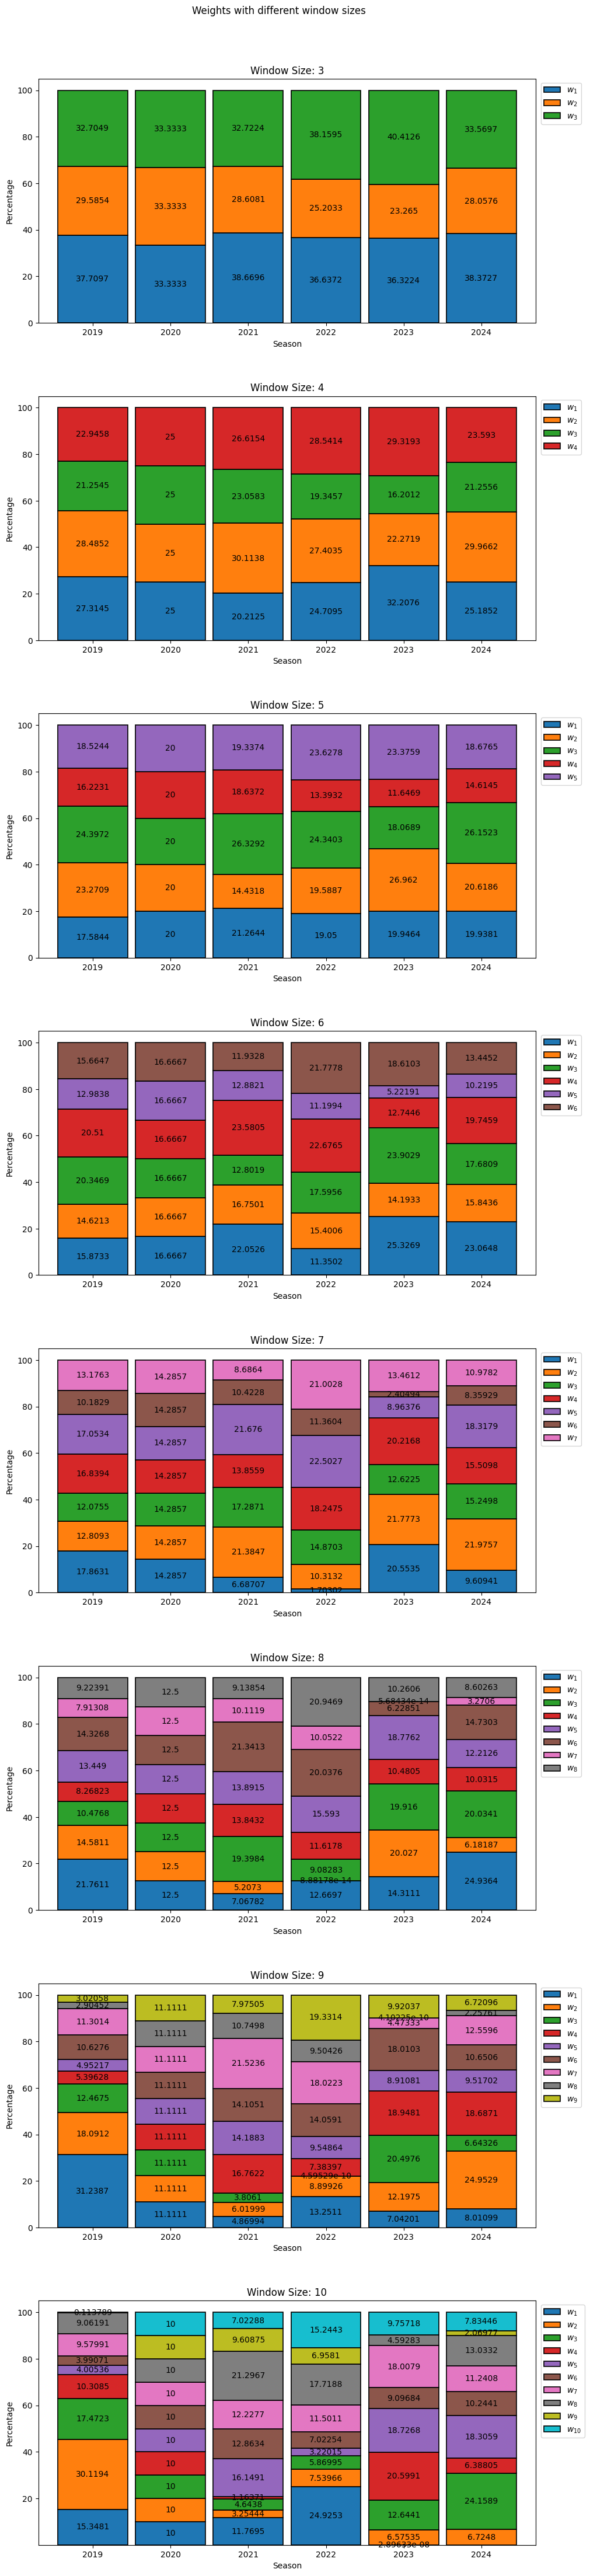

In [245]:

fig, axs = plt.subplots(highest_num_weights-lowest_num_weights+1, 1, figsize=(11,50))
fig.suptitle('Weights with different window sizes')

seasons = ['2019', '2020', '2021', '2022', '2023', '2024']

for i in range(len(diff_num_weights)):

    weights = np.array([diff_num_weights[i][j].to_numpy() for j in range(len(pitch_mult_yrs))])
    #weights = np.array([diff_num_weights[i][0].to_numpy(), diff_num_weights[i][1].to_numpy(), diff_num_weights[i][2].to_numpy()])

    df = pd.DataFrame(weights, columns=[fr'$w_{{ {j+1} }}$' for j in range(lowest_num_weights+i)])
    df.insert(0, 'Season', seasons) # Add the season column

    # Create the stacked bar chart
    df.plot(x='Season', kind='bar', stacked=True, ax=axs[i], rot=0, width=0.9, edgecolor='black', linewidth=1.2)
    
    # Adding values to each bar segment in bar chart
    for c in axs[i].containers:
        axs[i].bar_label(c, label_type='center')

    axs[i].set_title(f'Window Size: {lowest_num_weights+i}')
    axs[i].set_xlabel('Season')
    axs[i].set_ylabel('Percentage')
    axs[i].legend(bbox_to_anchor=(1.002, 1), loc='upper left')

plt.subplots_adjust(top=0.955, hspace=0.3)  
plt.show()